In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
from skimage import io, color, transform








In [5]:

Nx = 64
Ny = 64
# url1 = 'https://www.safetysign.com/images/source/page-list-pages/productgrid-n-t/Y1249.png'
# url = io.imread("../media/src/caution1.png", format = 'PNG')
x_true = io.imread('test.png')

x_true = color.rgba2rgb(x_true)
x_true = color.rgb2gray(x_true)
x_true = transform.resize(x_true, (Nx, Ny))
x_true = x_true/np.max(x_true)
x_true[x_true < 1e-1] = 0 
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
im = ax.imshow(x_true, interpolation='nearest')
ax.set_title('Input image')

plt.show()


ValueError: the input array must have size 4 along `channel_axis`, got (256, 256)

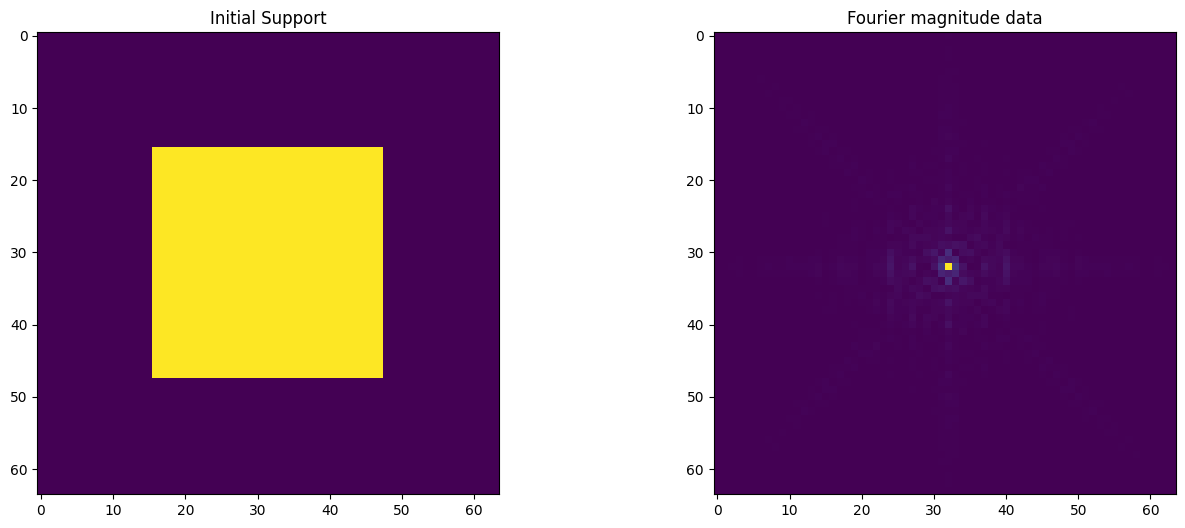

In [3]:

#  Now take the Fourier transform of the cat
X_true = np.fft.fftn(x_true)
M_true = np.abs(X_true)

# Make initial support
supp = np.zeros([Nx,Ny])
supp[16:48,16:48] = 1

fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(121)
im = ax.imshow(supp, interpolation='nearest')
ax.set_title('Initial Support')
ax = fig.add_subplot(122)
im = ax.imshow(np.fft.fftshift(M_true), interpolation='nearest')
ax.set_title('Fourier magnitude data')

plt.show()


In [4]:

# Define the projectors
def P_S(x, S_in):
    x_new = x*S_in['supp']
    return x_new

def P_M(x, M_in):
    X = np.fft.fftn(x)
    X_new = X/(np.abs(X)) * M_in['M_data']
    x_new = np.fft.ifftn(X_new)
    return x_new
def R_M(x, gamma_M, M_in):
    return (1+gamma_M)*P_M(x, M_in) - gamma_M*x

def R_S(x, gamma_S, S_in):
    return (1+gamma_S)*P_S(x, S_in) - gamma_S*x
C = np.zeros([Nx,Ny])
C = np.fft.fftshift(C)
C[20:44,20:44] = 1 # Magic numbers
C = np.fft.ifftshift(C)

def low_pass_filter(x):
    X = np.fft.fftn(x)
    X_new = X * C
    x_new = np.abs(np.fft.ifftn(X_new))
    return x_new


%matplotlib notebook


